#HR Employee Attrition

**Employee attrition refers to an employees’ voluntary or involuntary departure from an organization. The cost of employee attrition can be huge since replacing human resources with desired skill sets in a limited time is a difficult and costly task.¶**

In [1]:
#importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTETomek

In [2]:
df = pd.read_csv('employee_attrition_dataset.csv')

#Displaying contents of csv file
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Features Types

#### Categorical
- **Nominal**
    - Attrition
    - BusinessTravel
    - Department
    - EducationField
    - Gender
    - JobRole
    - MaritalStatus
    - OverTime
- **Ordinal**
    - Education
    - EnvironmentSatisfaction
    - JobInvolvement
    - JobLevel
    - JobSatisfaction
    - PerformanceRating
    - RelationshipSatisfaction
    - StockOptionLevel
    - WorkLifeBalance
    
#### Numerical
- **Continuous**
    - Age
    - DailyRate
    - DistanceFromHome
    - HourlyRate
    - MonthlyIncome
    - MonthlyRate
    - NumCompaniesWorked
    - PercentSalaryHike
    - TotalWorkingYears
    - TrainingTimesLastYear
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsSinceLastPromotion
    - YearsWithCurrManager

In [3]:
df.shape

(1470, 35)

The data has 1470 rows and 35 columns

In [4]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here we discover interesting information.
1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we could definitely drop it as well.
3. Column 'Over18' is another interesting column which tells us every employee in this dataset is over 18 and we will drop it as well.
4.Column 'EmployeeNumber' is a unique number linked with 1 employee only and we shall drop it

In [6]:
# drop out features that give out useless information
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
#Checking for duplicates
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


No duplicates where found

In [8]:
#Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No missing values

##Exploratory Data Analysis

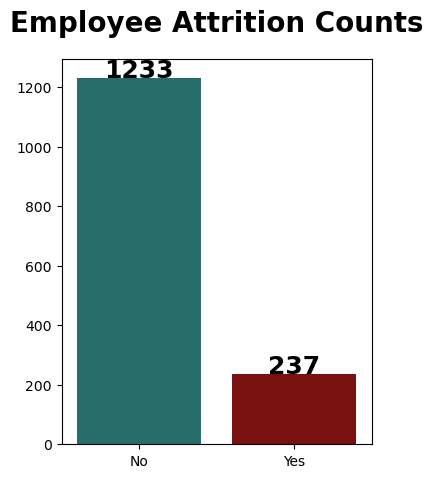

In [9]:
# check distribution for target variable
plt.figure(figsize=(4,5))
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

No means that Number of people who didnt leave the company and yes where the number of people who left the company.
Theres an imbalance in the target variable since the number of nos(1233) are more than the yeses(237) and this creates a bias hence theres a need to balance the data using statistical methods

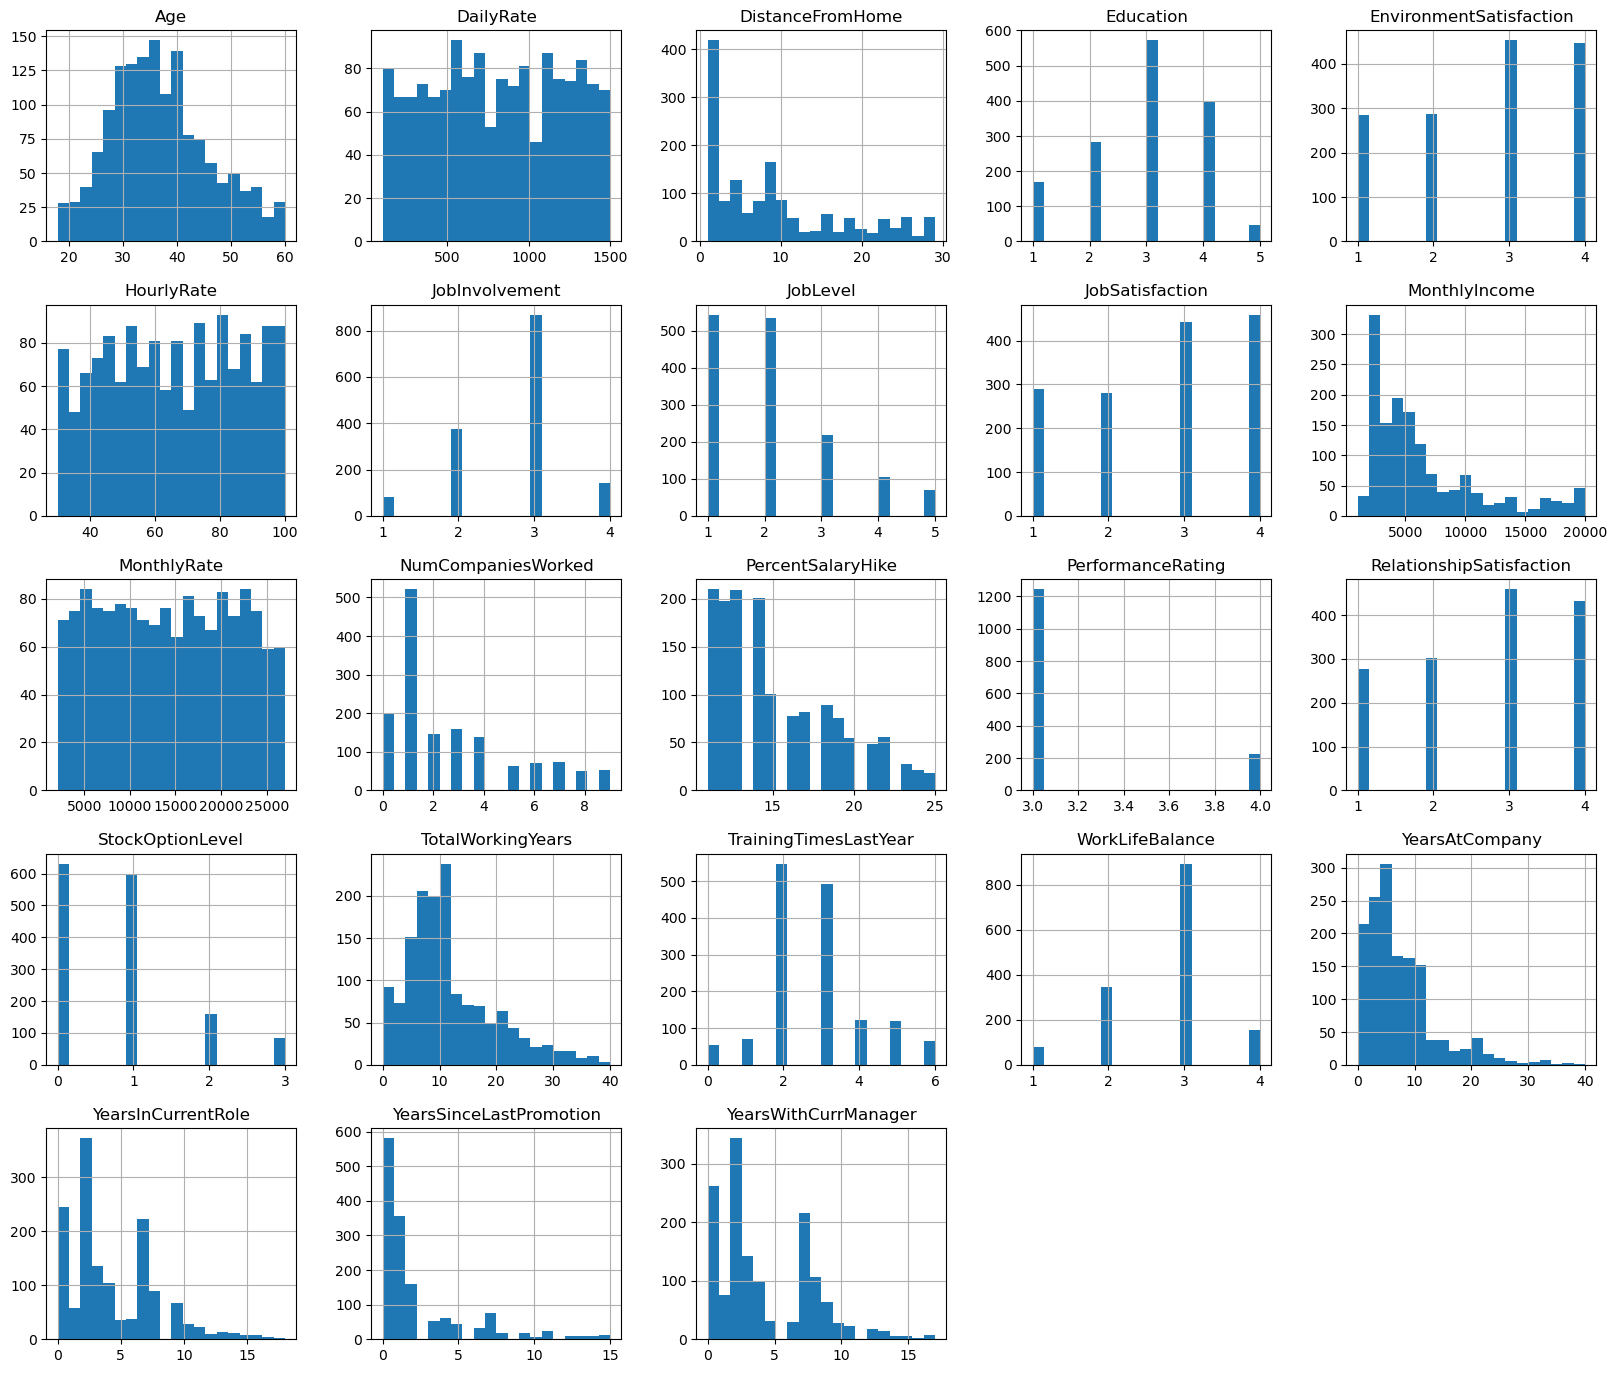

In [10]:
df.hist(bins=20, figsize=(20, 17))
plt.show()

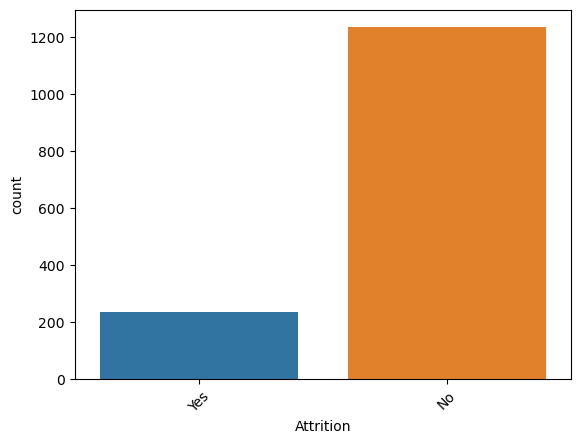

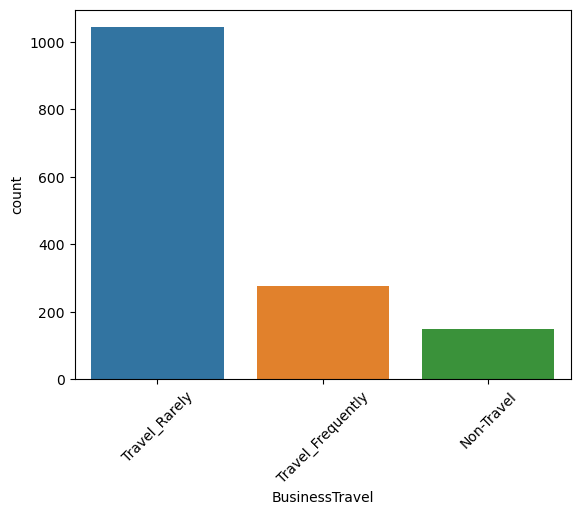

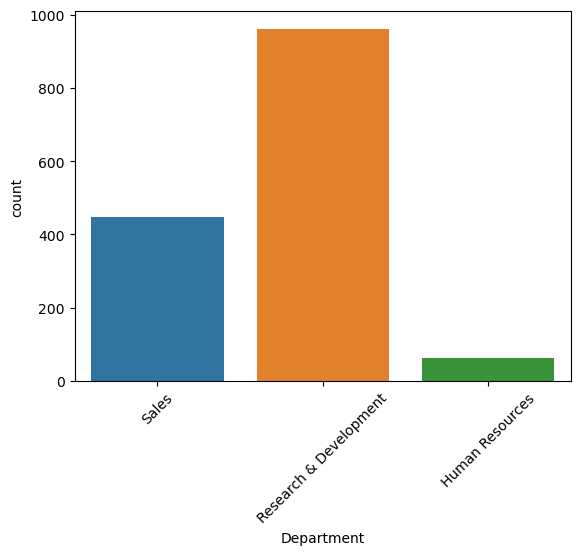

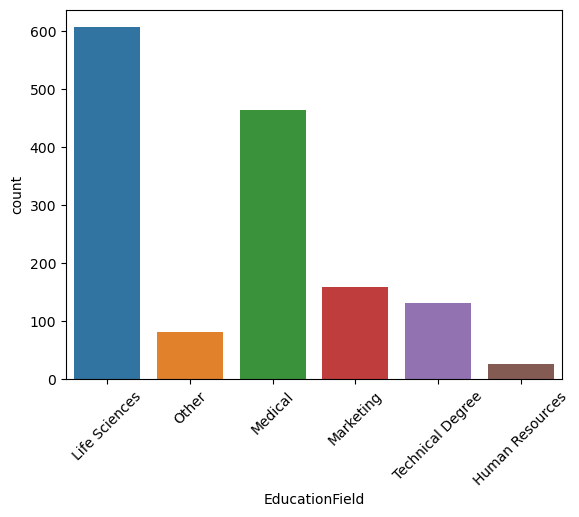

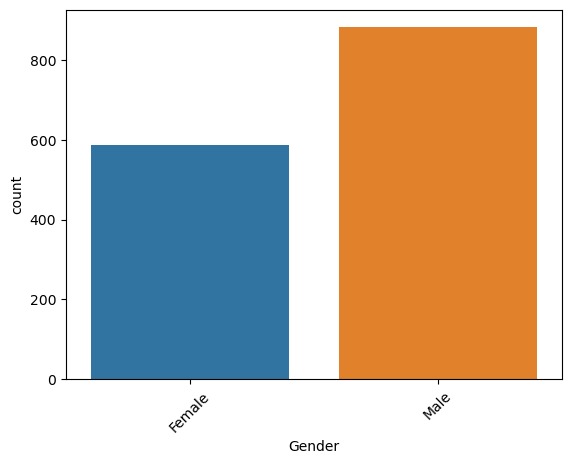

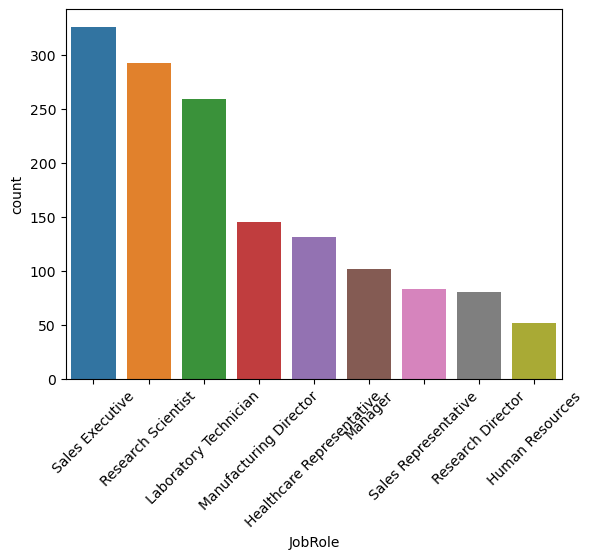

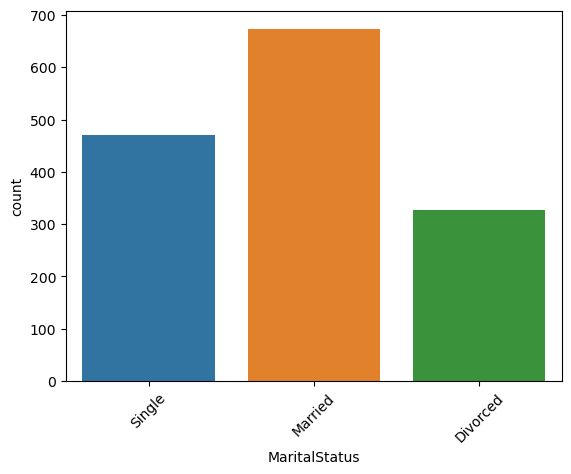

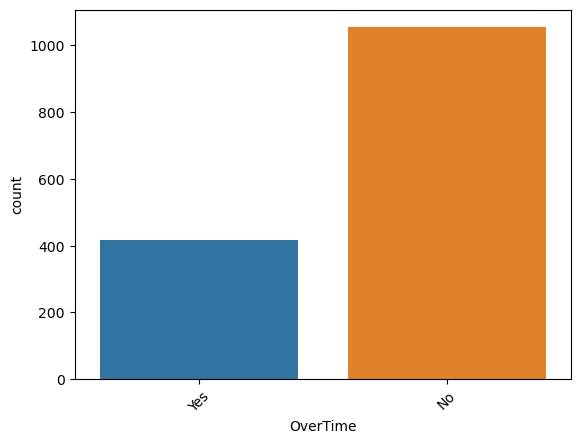

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

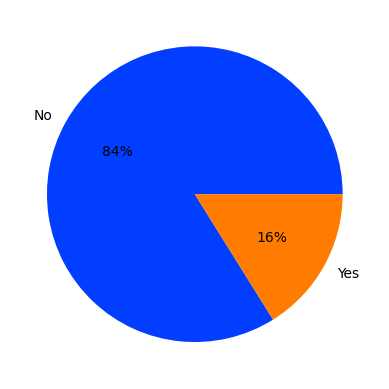

In [11]:
s = df['Attrition'].value_counts()
colors = sns.color_palette('bright')
plt.pie(s, labels= s.index, colors= colors, autopct = '%.0f%%')
plt.show()

**The target varriable is highly imbalanced**

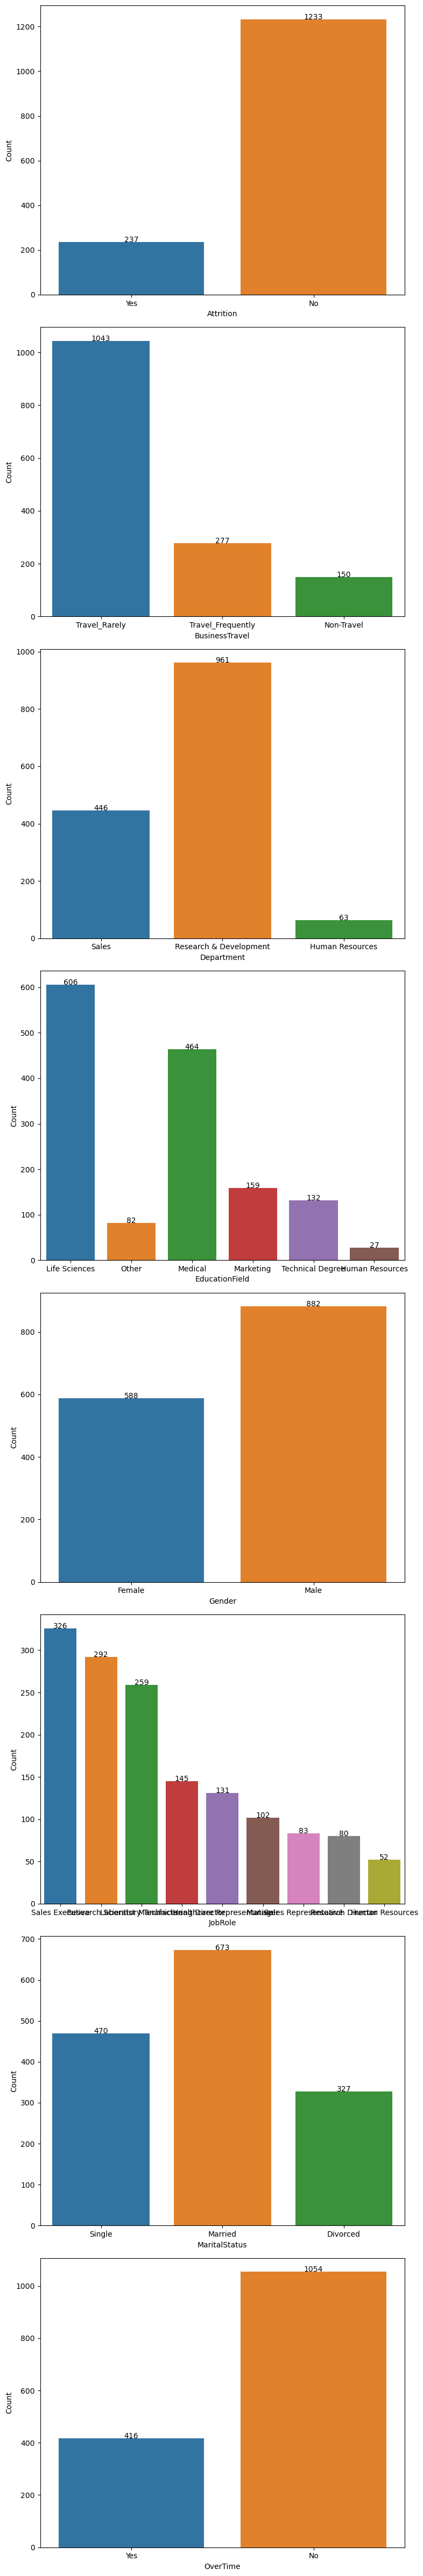

In [12]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(8, 6 * len(categorical_cols)))

# Loop through categorical columns
for i, col in enumerate(categorical_cols):
    # Create a count plot
    sns.countplot(x=col, data=df, ax=axes[i])

    # Annotate the bars with counts
    for p in axes[i].patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(int(p.get_height()), (x, y), ha='center')

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


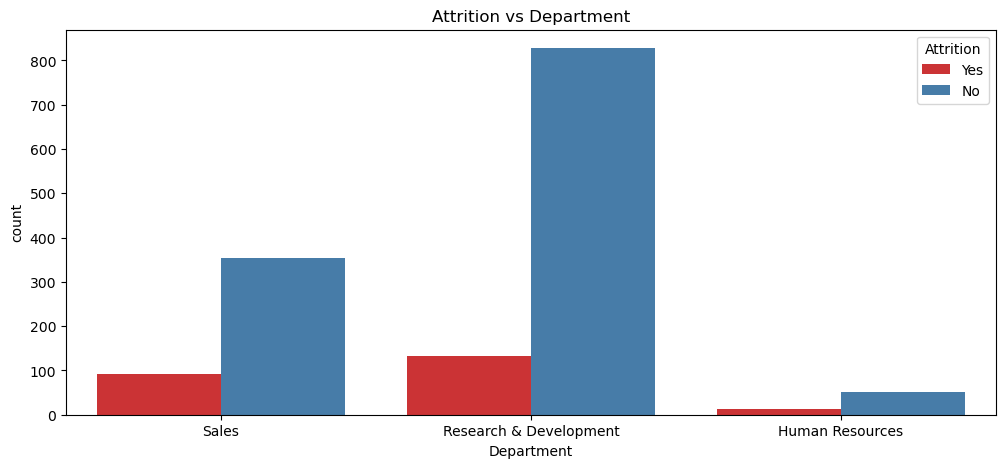

In [58]:
 #attrition with respect to department
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=df,palette='Set1')
plt.title('Attrition vs Department')
plt.show()


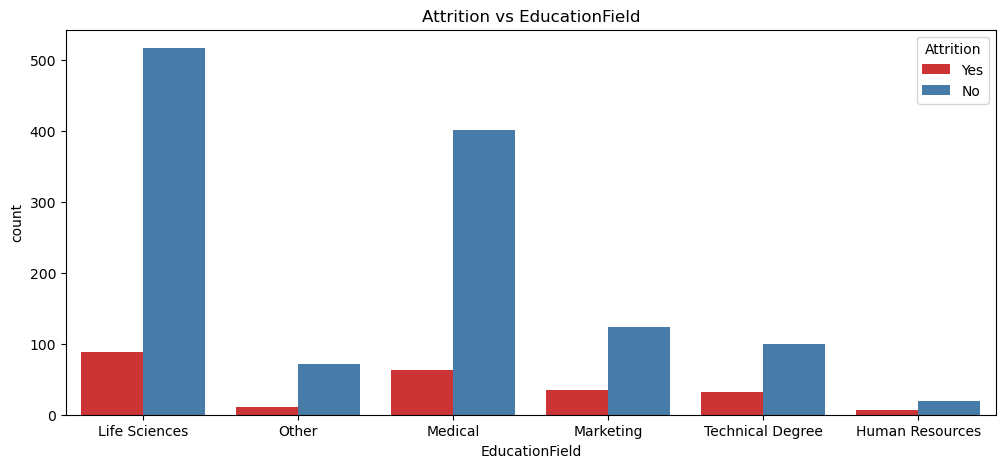

In [13]:
#attrition with respect to education field
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='Set1')
plt.title('Attrition vs EducationField')
plt.show()

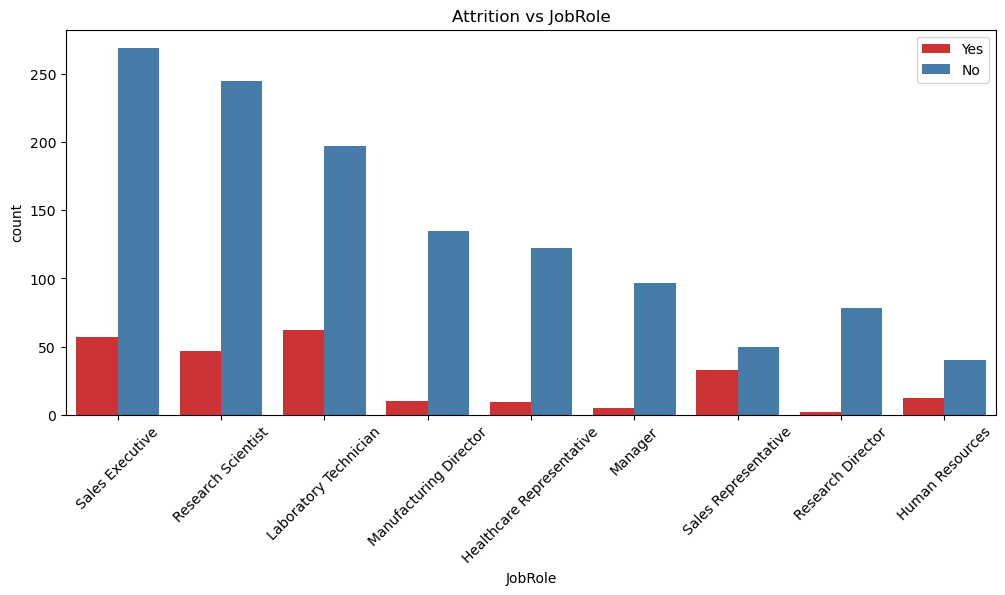

In [14]:
#attrition with respect to JobRole
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='Set1')
plt.title('Attrition vs JobRole')
plt. legend(loc="best")
plt.xticks(rotation=45)
plt.show()

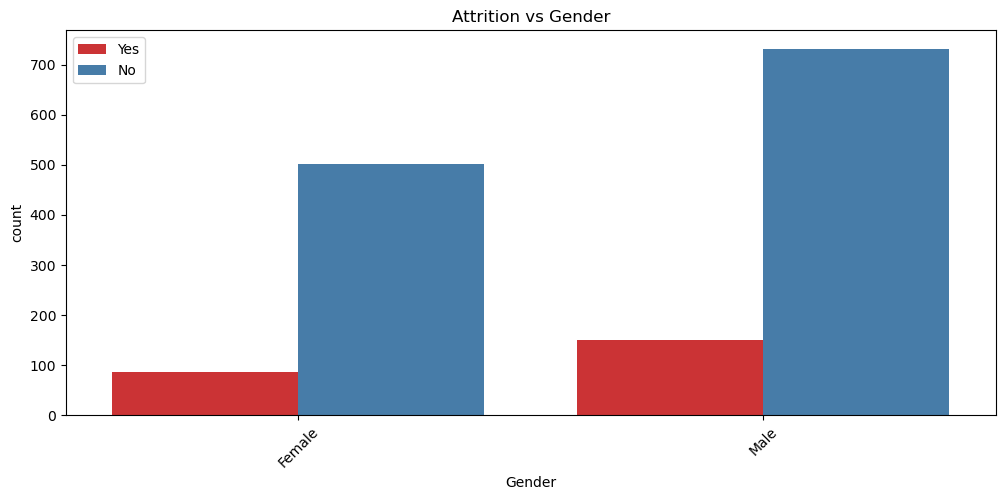

In [15]:
#attrition with respect to Gender
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=df,palette='Set1')
plt.title('Attrition vs Gender')
plt. legend(loc="best")
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5992\237802770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":6})


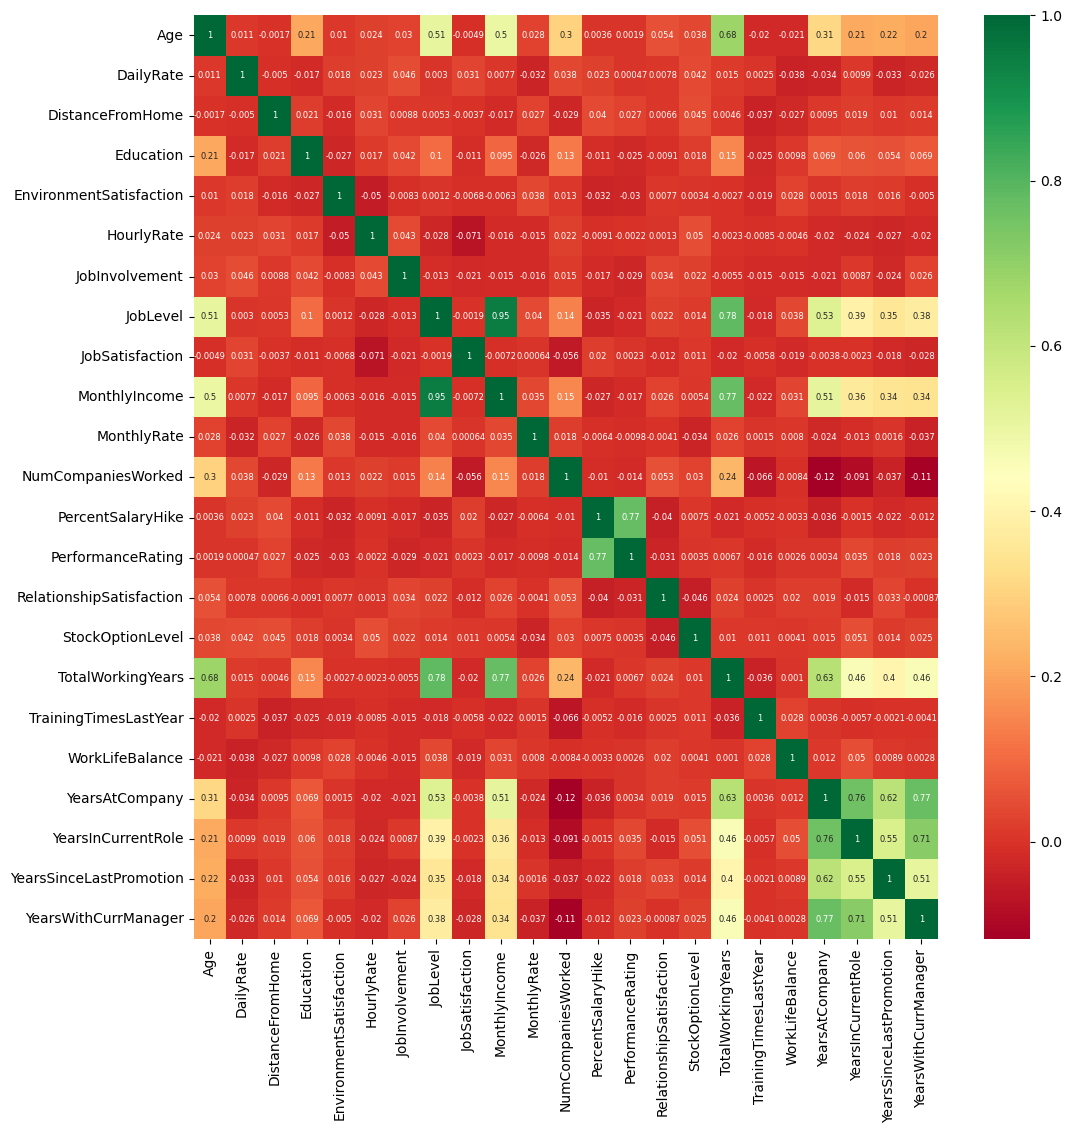

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":6})
plt.show()

1. Job level and monthly income highly correlated
2. Job level and totalworking years highly correlated


**feature engineering**
1.Encoding ,Machine Learning model cannot work with categorical data and needs to be converted into numerical data. 

In [19]:
from sklearn.preprocessing import LabelEncoder
object_columns = ['Attrition','BusinessTravel', 'Gender', 'OverTime']
le = LabelEncoder()
for column in object_columns:
    df[column] = le.fit_transform(df[column])

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,Research & Development,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8


In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


**feature selection**

In [24]:
#Splitting the data for feature slection
xa = df.drop(columns=['Attrition'])  # Features
ya = df['Attrition']  # Target variable

In [25]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(xa, ya)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(xa, ya)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': xa.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores


,Feature,Combined_Score
11,MonthlyIncome,127960.782513
12,MonthlyRate,1196.971469
2,DailyRate,961.307134
19,TotalWorkingYears,274.974109
22,YearsAtCompany,169.101678
14,OverTime,158.501524
23,YearsInCurrentRole,156.360899
25,YearsWithCurrManager,147.383845
0,Age,122.331164
46,MaritalStatus_Single,77.378654


In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


We drop columns having a combined score of 0.5 and below

In [27]:
df = df.drop(columns = ['PerformanceRating', 'JobRole_Research Scientist', 'BusinessTravel'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [28]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dire

In [29]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [32]:
numerical_list = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'  ]

**Training the model**

In [34]:
#Splitting the data
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

In [36]:
#splitting  the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

**scaling the data**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_list] = scaler.fit_transform(X_train[numerical_list])
X_test[numerical_list] = scaler.transform(X_test[numerical_list])


**Building the model**

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
y_pred = classifier.predict(X_test)

**Measure the accuracy of the model**

In [40]:
#getting accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[212  33]
 [ 33  16]]


0.7755102040816326

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



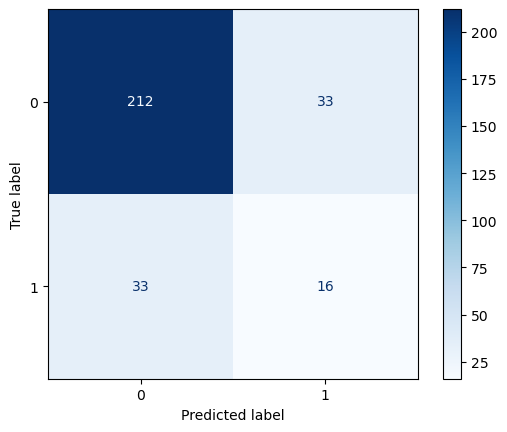

In [41]:
#Printing the classification report and displaying the confusion matrix
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

#sns.heatmap(cm, annot=True , cmap='Blues')

**determining the feature considered by the model**

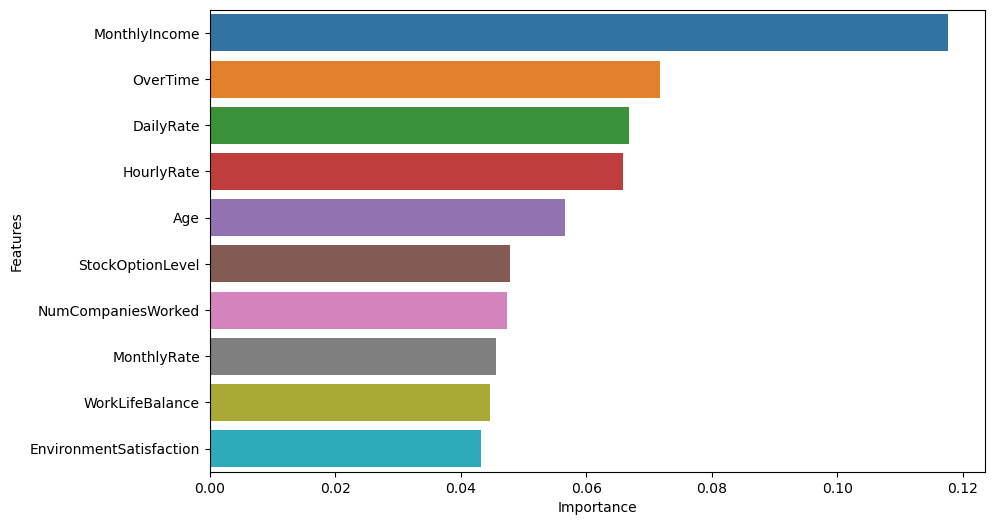

In [42]:
IP=pd.DataFrame({"Features":np.array(X.columns),"Importance":classifier.feature_importances_})
IP=IP.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features', data=IP[:10])
plt.show()

**Dealing with the imbalance in the taget varriable**

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
from collections import Counter
# Print the class distribution before resampling
print("Class distribution before resampling:", Counter(y))

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

In [44]:
y_resampled.value_counts()

NameError: name 'y_resampled' is not defined

In [ ]:
#splitting the resampled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_list] = scaler.fit_transform(X_train[numerical_list])
X_test[numerical_list] = scaler.transform(X_test[numerical_list])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#getting accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
#Printing the classification report and displaying the confusion matrix
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

#sns.heatmap(cm, annot=True , cmap='Blues')

In [ ]:
IP=pd.DataFrame({"Features":np.array(X.columns),"Importance":classifier.feature_importances_})
IP=IP.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features', data=IP[:10])
plt.show()

**cross validation to cater for model over fitting and under fitting**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X =X_train , y= y_train, cv= 10)
print('Accuracy: {:.2f}%' .format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%' .format (accuracies.std()*100))

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error

In [ ]:
** hyperparameter tuning**

In [ ]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
#start_time = time.time()
g1.fit(X_train,y_train)
#duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1


In [ ]:
# compute performance on test set
model = g1.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))
#print('computation time: %.2f' % duration)